<a href="https://colab.research.google.com/github/KimSiGyum/Python/blob/main/3O4O5_%EA%B9%80%EC%8B%9C%EA%B2%B8_%EC%A3%BC%EC%A0%9C2_%EC%9D%98%EB%A3%8C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98(%ED%95%99%EC%83%9D%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[주제2] 의료 이미지 분류 (난이도 높음)**
---

<img src='https://drive.google.com/uc?id=1ZdkL3BXiApD5gjqpfN41R1mac2r882oI' width=850>

---

## **0. 필요한 모듈 가져오기**
라이브러리 및 모듈은 이 곳에서 한 번에 가져와도 되고 필요한 셀에서 바로 추가해도 됩니다.

In [ ]:
import numpy as np
import pandas as pd

## **1. 데이터 가져오기**
아래 코드를 실행하여 데이터를 읽어오세요. (변수명은 원한다면 변경해도 됩니다.)

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 가져오기
x_train = np.load('/content/drive/MyDrive/Colab Notebooks/data/X_train.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/data/y_train.npy')
x_test = np.load('/content/drive/MyDrive/Colab Notebooks/data/X_test.npy')
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/data/y_test.npy')

##**2. 데이터 준비 및 분석하기**
문제 상황에 맞게 아래 작업을 수행하세요.
- (과제1) 데이터 탐색 <br>
- (과제2) 데이터 전처리

In [ ]:
# 코드 셀을 추가하여 필요한 작업 실행
print('데이터 형태', x_train.shape, y_train.shape)
print('테스트 데이터 형태', x_test.shape, y_test.shape)
print('데이터 차원', x_train.ndim, y_train.ndim)
print('테스트 데이터 차원', x_test.ndim, y_test.ndim)

x_train = x_train.reshape((40000, 64, 64))
x_test = x_test.reshape((10000, 64, 64, 1))
x_train = x_train / 255
x_test = x_test / 255

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

데이터 형태 (40000, 64, 64) (40000,)
테스트 데이터 형태 (10000, 64, 64) (10000,)
데이터 차원 3 1
테스트 데이터 차원 3 1


##**3. 모델 학습시키기**
문제 상황에 맞게 아래 작업을 수행하세요.
- (과제3) 신경망 모델 생성 (신경망 구조, 학습 방법 결정)
- (과제4) 신경망 모델 학습 <br>
※ (과제5) 학습 과정에서 검증(validation) 세트를 이용하고 결과를 분석하여 최종 모델 도출

In [ ]:
# 코드 셀을 추가하여 필요한 작업 실행
from keras.models import Sequential # 신경망 모델 클래스
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential() # 신경망 객체 생성
model.add(Input(shape=(64, 64, 1))) # 입력
model.add(Conv2D(filters = 32, kernel_size=(2, 2), strides=(1, 1), padding='same')) # 합성곱층
model.add(MaxPooling2D(pool_size=(2, 2))) # 풀링층
model.add(Flatten()) # 차원변경
model.add(Dense(512, activation='relu')) # 은닉층
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', # 범주형 크로스엔트로피
              optimizer = 'SGD', # 확률적 경사하강법
              metrics = ['accuracy']) # 정확도
model.fit(x_train, y_train, batch_size = 128, epochs = 10)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8217 - loss: 0.5621
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9860 - loss: 0.0971
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9909 - loss: 0.0542
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9933 - loss: 0.0412
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9946 - loss: 0.0323
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9949 - loss: 0.0309
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9951 - loss: 0.0259
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9958 - loss: 0.0239
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9962 - loss: 0.0210
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9960 - loss: 0.0202


##**4. 모델 평가하기**
문제 상황에 맞게 아래 작업을 수행하세요.
- (과제6) 모델 성능 평가

In [ ]:
# 코드 셀을 추가하여 필요한 작업 실행
loss, accuracy = model.evaluate(x_test, y_test)
print('손실은', loss, '입니다.')
print('정확도는', accuracy, '입니다.')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9942 - loss: 0.0252
손실은 0.02368505485355854 입니다.
정확도는 0.9945999979972839 입니다.


##**5. 모델 활용하기**
문제 상황에 맞게 <u>아래 작업 중 하나 이상</u>을 수행하세요.
- (과제7) 테스트 데이터의 분류 결과 확인
- (과제7) 새로운 데이터의 분류 결과 확인<br>
※ 새로운 데이터는 업로드된 0~5.png 파일을 이용하거나, 웹에서 구한 이미지를 가공하여 사용

In [ ]:
# 코드 셀을 추가하여 필요한 작업 실행
y_prob = model.predict(x_test[0].reshape((1, 64, 64, 1)))
y_pred= y_prob.argmax(axis=-1) # 배열 내 최대값의 인덱스 반환
print("이 의료 이미지는", y_pred,"번 클래스입니다.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
이 의류는 [4] 번 클래스입니다.


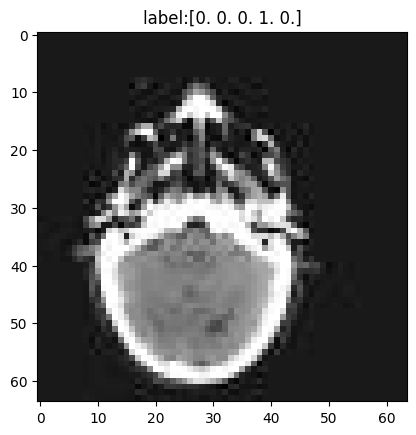

In [ ]:
n = 0
import matplotlib.pyplot as plt
plt.title("label:"+str( y_train[n]) )
plt.imshow(x_test[n], cmap=plt.cm.gray)
plt.show()

※ 아래는 이미지 파일을 업로드하고 넘파이 배열(image)로 읽어오는 코드입니다.<br>
필요한 경우 실행하여 활용하세요.

In [ ]:
# 파일 업로드하기
from google.colab import files
uploaded = files.upload()

Saving 0.png to 0 (1).png


In [ ]:
# 이미지를 회색조로 변환하기
import cv2
image = cv2.imread('0.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

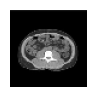

In [ ]:
# 이미지 출력하기
plt.figure(figsize = (1, 1))
plt.axis('off')
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

In [ ]:
# 코드 셀을 추가하여 필요한 작업 실행